# Linear Regression

Tudor Berariu, Andrei Nica, 2018

In [21]:
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## The dataset

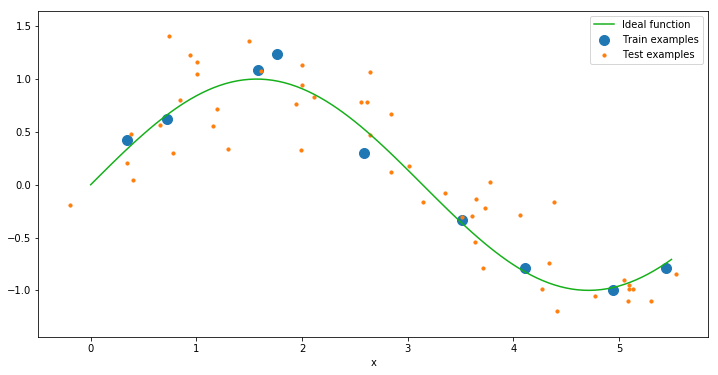

In [92]:
def generate_examples(N:int = 9, noise:float = 0.2, dist_noise:float = 0.2):
    X = np.linspace(0, 1.75 * math.pi, N)
    X += np.random.randn(N) * dist_noise
    T = np.sin(X) + np.random.randn(N) * noise
    return X, T

N_train = 9
N_test = 50
noise = 0.25

X_train, T_train = generate_examples(N=N_train, noise=noise)
X_test, T_test = generate_examples(N=N_test, noise=noise)
X_real, T_real = generate_examples(100, .0, .0)

plt.figure(figsize=(12,6)); plt.axis('equal')
plt.plot(X_real, T_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.scatter(X_train, T_train, s=100, label="Train examples")
plt.scatter(X_test, T_test, s=10, label="Test examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

## Extracting features
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$

In [93]:
def extract_features(X: np.array, M: int):
    N = X.size
    phi = np.ones((N, M + 1))
    for j in range(1, M+1):
        phi[:,j] = phi[:,j-1] * X
    return phi

extract_features(X_train, 4)

array([[1.00000000e+00, 3.47771856e-01, 1.20945264e-01, 4.20613589e-02,
        1.46277568e-02],
       [1.00000000e+00, 7.21541994e-01, 5.20622849e-01, 3.75651248e-01,
        2.71048150e-01],
       [1.00000000e+00, 1.58012956e+00, 2.49680941e+00, 3.94528234e+00,
        6.23405723e+00],
       [1.00000000e+00, 1.76597458e+00, 3.11866623e+00, 5.50748530e+00,
        9.72607906e+00],
       [1.00000000e+00, 2.58807898e+00, 6.69815282e+00, 1.73353485e+01,
        4.48652512e+01],
       [1.00000000e+00, 3.51341200e+00, 1.23440639e+01, 4.33697821e+01,
        1.52375913e+02],
       [1.00000000e+00, 4.11551543e+00, 1.69374672e+01, 6.97064078e+01,
        2.86877797e+02],
       [1.00000000e+00, 4.94096653e+00, 2.44131502e+01, 1.20624558e+02,
        5.96001904e+02],
       [1.00000000e+00, 5.44452667e+00, 2.96428707e+01, 1.61391400e+02,
        8.78699781e+02]])

## Closed-form solution

We search for $${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf w}^{\text{T}}{\bf \phi}^{(n)} - t^{(n)}\right)^2$$

In [94]:
def mean_squared_error(Y, T):
    return np.mean((Y - T) * (Y- T))

In [95]:
def train_params(X, T, M):
    Phi = extract_features(X, M)
    W = np.dot(np.linalg.pinv(Phi),T)
    return W

In [96]:
def predict(X, W, M):
    Phi = extract_features(X, M)
    Y = np.dot(Phi, W)
    return Y

## Visualise learned predictor

Train error: 3.965374963768008e-17
Test  error: 0.9077107015909734


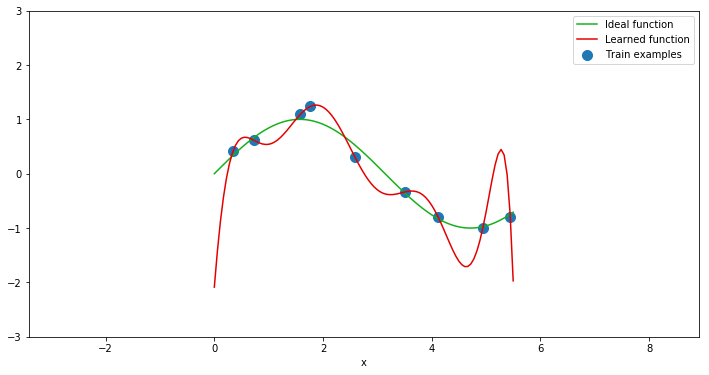

In [102]:
M = 9

# Train
W = train_params(X_train, T_train, M)

# Compute mean squared error
Y_train = predict(X_train, W, M)
Y_test = predict(X_test, W, M)
print("Train error:", mean_squared_error(Y_train, T_train))
print("Test  error:", mean_squared_error(Y_test, T_test))

# Plot
Y_real = predict(X_real, W, M)

plt.figure(figsize=(12,6)); plt.axis('equal'); plt.ylim(-3, 3)
plt.plot(X_real, T_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.plot(X_real, Y_real, sns.xkcd_rgb["red"], label="Learned function")
plt.scatter(X_train, T_train, s=100, label="Train examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

## Evaluate predictor

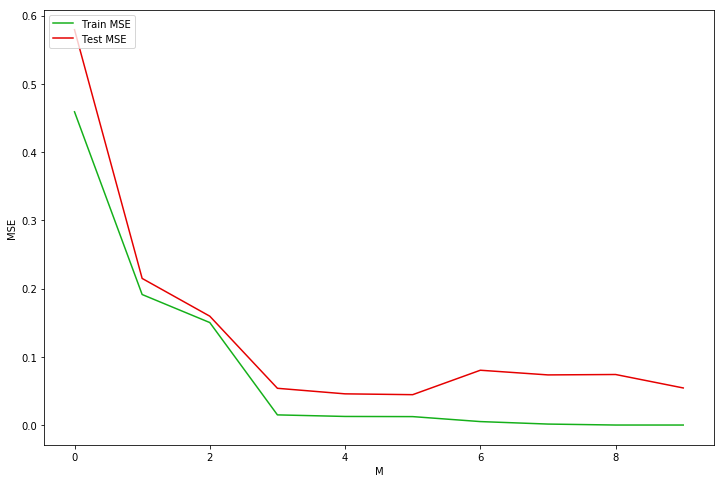

In [91]:
train_mse = []
test_mse = []
for M in range(10):
    W = train_params(X_train, T_train, M)
    Y_train = predict(X_train, W, M)
    Y_test = predict(X_test, W, M)
    train_mse.append(mean_squared_error(Y_train, T_train))
    test_mse.append(mean_squared_error(Y_test, T_test))

plt.figure(figsize=(12,8))
plt.plot(range(10), train_mse, sns.xkcd_rgb["green"], label="Train MSE")
plt.plot(range(10), test_mse, sns.xkcd_rgb["red"], label="Test MSE")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()